In [1]:
import numpy  as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from invisible_cities.reco.corrections        import read_maps
from invisible_cities.io.dst_io               import load_dsts
from invisible_cities.core.fit_functions      import profileX
from invisible_cities.core.core_functions     import in_range

from krcal.core.fit_functions                 import expo_seed
from krcal.core    .selection_functions       import select_xy_sectors_df

In [4]:
run_number = 8088 # 0 or negative for MC
rcut = 100
zcut = 100
name = 'samp1_int4'
outputdir = '/n/home12/tcontreras/plots/nz_analysis/'+name+'/'

z_range_plot = (0, 600)
q_range_plot = (500, 900)

maps_dir = '../../data/trigger1/8087/maps/'
sipm_map = 'map_8087_test.h5'
pmt_map = 'map_pmt_8087_test.h5'
this_map = read_maps(maps_dir+sipm_map)

input_folder       = '../../data/trigger1/8088/kdsts/sthresh/'
input_dst_file     = '*.h5'
input_dsts         = glob.glob(input_folder + input_dst_file)

In [5]:
### Load files in make R and Zcut
dst = load_dsts(input_dsts, 'DST', 'Events')
dst = dst.sort_values(by=['time'])

In [14]:
dst.S2q = np.zeros(np.shape(dst.S2q.to_numpy()))

In [25]:
np.mean(dst.S2q)

0.0

In [3]:
### Load files in make R and Zcut
dst = load_dsts(input_dsts, 'DST', 'Events')
dst = dst.sort_values(by=['time'])

### Select events with 1 S1 and 1 S2
mask_s1 = dst.nS1==1
mask_s2 = np.zeros_like(mask_s1)
mask_s2[mask_s1] = dst[mask_s1].nS2 == 1
nevts_after      = dst[mask_s2].event.nunique()
nevts_before     = dst[mask_s1].event.nunique()
eff              = nevts_after / nevts_before
print('S2 selection efficiency: ', eff*100, '%')

### Band Selection (S2 energy or q selection?)
x, y, _ = profileX(dst[mask_s2].Z, dst[mask_s2].S2q, yrange=q_range_plot)
e0_seed, lt_seed = expo_seed(x, y)
lower_e0, upper_e0 = e0_seed-200, e0_seed+200    # play with these values to make the band broader or narrower

sel_krband = np.zeros_like(mask_s2)
Zs = dst[mask_s2].Z
sel_krband[mask_s2] = in_range(dst[mask_s2].S2q, (lower_e0)*np.exp(Zs/lt_seed), (upper_e0)*np.exp(Zs/lt_seed))
dst = dst[sel_krband]
dst

S2 selection efficiency:  99.15492957746478 %


,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
145,2,1.594459e+09,0,0,1,1,200.0,2.119782,11.106052,358325.0,...,29,446.148132,446.148132,2.150228,-28.417331,-5.687920,28.980979,-2.944046,27.607322,14.382642
155,4,1.594459e+09,0,0,1,1,150.0,1.013140,4.501678,674375.0,...,24,128.132187,128.132187,1.165750,119.119204,-110.069629,162.187262,-0.745933,10.190604,18.083337
156,5,1.594459e+09,0,0,1,1,275.0,2.415916,12.191276,512750.0,...,26,290.724640,290.724640,1.765192,-78.479920,78.690121,111.136101,2.354857,19.431846,19.934491
157,6,1.594459e+09,0,0,1,1,275.0,2.955675,15.555415,435200.0,...,23,367.299957,367.299957,1.977364,-109.821056,154.059938,189.196007,2.190092,26.496610,40.672392
158,7,1.594459e+09,0,0,1,1,175.0,2.247239,9.132998,392925.0,...,26,410.551514,410.551514,2.049255,73.930420,-135.317667,154.196557,-1.070762,17.700647,15.672647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,464,1.594459e+09,0,0,1,1,150.0,2.104201,9.348372,595425.0,...,24,208.078079,208.078079,1.479378,6.524225,-131.800476,131.961854,-1.521336,13.925589,11.676902
141,465,1.594459e+09,0,0,1,1,125.0,1.709408,6.119900,565950.0,...,27,237.535767,237.535767,1.518284,-120.716585,66.068097,137.613543,2.640825,31.380057,27.819358
142,466,1.594459e+09,0,0,1,1,200.0,2.863199,14.532549,427175.0,...,23,376.316254,376.316254,1.918280,-65.480429,181.452107,192.905557,1.917121,19.639810,14.628099
143,467,1.594459e+09,0,0,1,1,175.0,2.089042,10.237351,720625.0,...,24,81.822815,81.822815,0.953590,-102.139137,-73.734976,125.973211,-2.516315,9.329010,9.093966


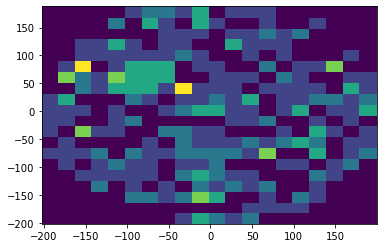

In [4]:
plt.hist2d(dst.X, dst.Y, 20)
plt.show()

In [18]:
zcuts = [0,200,400,600]
XYbins = [21,21]
xy_range = (-200,200)
xybins = np.linspace(*xy_range, XYbins[0]+1)
xybins

array([-200.        , -180.95238095, -161.9047619 , -142.85714286,
       -123.80952381, -104.76190476,  -85.71428571,  -66.66666667,
        -47.61904762,  -28.57142857,   -9.52380952,    9.52380952,
         28.57142857,   47.61904762,   66.66666667,   85.71428571,
        104.76190476,  123.80952381,  142.85714286,  161.9047619 ,
        180.95238095,  200.        ])

In [19]:
this_map = dst.groupby([pd.cut(dst.X, xybins), pd.cut(dst.Y, xybins)]).S2q.mean().unstack().fillna(0)

In [21]:
this_map.columns = [int(round(xybins[i:i+2].mean())) for i in range(len(xybins)-1)] #.rename(columns=xybins, index=xybins)
this_map.index = [int(round(xybins[i:i+2].mean())) for i in range(len(xybins)-1)]

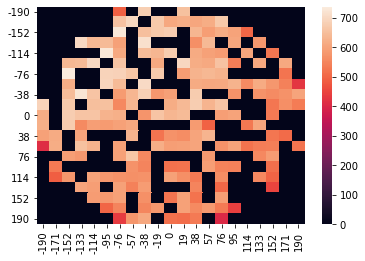

In [27]:
sns.heatmap(this_map)

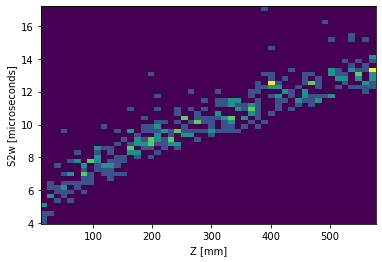

In [12]:
plt.hist2d(dst.Z, dst.S2w, bins=50)
plt.xlabel('Z [mm]')
plt.ylabel('S2w [microseconds]')
plt.show()

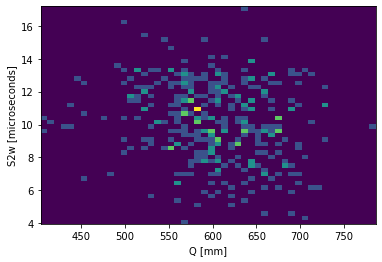

In [15]:
plt.hist2d(dst.S2q, dst.S2w, bins=50)
plt.xlabel('Q [mm]')
plt.ylabel('S2w [microseconds]')
plt.show()

In [10]:
bin_widths = [5,10,15,20]
s2_bincenter = 802
outer_bincenter = 1000
s2_windows = []
outer_windows = []
for i in range(len(bin_widths)):
    s2_windows.append([int(s2_bincenter - (bin_widths[i]/2.)), int(s2_bincenter + (bin_widths[i]/2.))])
    outer_windows.append([int(outer_bincenter - (bin_widths[i]/2.)), int(outer_bincenter + (bin_widths[i]/2.))])                
                      

In [44]:
len(np.unique(dst.event.to_numpy())), dst.event.count()

(344, 344)